## Importing Libraries 

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Scrapping - Nykaa Website (Makeup Section)

In [ ]:
pages = []
product_name = []
original_price = []
discount_price = []
discount_percentage = []
stars = []
no_of_ratings = []
no_of_reviews = []
product_url = []

for i in range(1, 56):
    url = "https://www.nykaa.com/makeup/c/12?page_no="+"{}".format(i)
    print(url)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "lxml")

    names = soup.find_all("div", class_ = "css-xrzmfa")

    #product name
    for j in names:
        if j is not None:
            t = j.text
        else: 
            t = "NA"
        product_name.append(t)
    
    #original price
    o_price = soup.find_all("span", class_ = "css-17x46n5")
    for j in o_price:
        if j is not None:
            t = j.text
        else: 
            t = "NA"
        original_price.append(t)
    
    #discount price
    d_price = soup.find_all("span", class_ = "css-111z9ua")
    for j in d_price:
        if j is not None:
            t = j.text
        else: 
            t = "NA"
        discount_price.append(t)
    
    #product url
    head = soup.find_all("div", class_ = "css-d5z3ro")
    str = "https://nykaa.com"
    for j in head:
        temp = j.find("a", class_ = "css-qlopj4").get("href")
        product_url.append(str + temp)

#discount percentage
for j in product_url:
    res = requests.get(j)
    res = res.content
    soup = BeautifulSoup(res, "html.parser")        
    temp = soup.find("span", class_ = "css-bhhehx")
    if temp is not None:
        t = temp.text
    else: 
        t = "NA"
    discount_percentage.append(t)

#rating stars
for j in product_url:
    res = requests.get(j)
    res = res.content
    soup = BeautifulSoup(res, "html.parser")        
    temp = soup.find("div", class_ = "css-m6n3ou")
    if temp is not None:
        t = temp.text
    else: 
        t = "NA"
    stars.append(t)

#ratings
for j in product_url:
    res = requests.get(j)
    res = res.content
    soup = BeautifulSoup(res, "html.parser")
    temp = soup.find("div", class_ = "css-1hvvm95")
    if temp is not None:
        t = temp.text
    else: 
        t = "NA"
    no_of_ratings.append(t)

#reviews
for j in product_url:
    res = requests.get(j)
    res = res.content
    soup = BeautifulSoup(res, "html.parser")
    temp = soup.find_all("div", class_ = "css-1hvvm95")
    if len(temp) >= 3:
        if temp[2] is not None:
            t = temp[2].text
        else: 
            t = "NA"
    else:
        t = "NA"
    no_of_reviews.append(t)
    
print(product_name)
print(original_price)
print(discount_price)
print(discount_percentage)
print(product_url)
print(stars)
print(no_of_ratings)
print(no_of_reviews)

df = pd.DataFrame({"Product Name":product_name, "Product Url":product_url, "Original Price":original_price, 
                   "Discount Price":discount_price, "Discount Percentage":discount_percentage, "Stars":stars, 
                   "Ratings":no_of_ratings, "Reviews":no_of_reviews})
print(df)

df.to_csv("nykaa_makeup_products.csv")

## Reading Data

In [83]:
nykaa = pd.read_csv(r"C:\Users\Riya\OneDrive\Desktop\Nykaa Scrapping\nykaa_makeup_products.csv")
nykaa

,Product Name,Product Url,Original Price,Discount Price,Discount Percentage,Stars,Ratings,Reviews
0,Lakme 9 To 5 Wet & Dry Compact,https://nykaa.com/lakme-9-to-5-wet-dry-compact...,MRP:₹650,₹423,35% Off,4.2/5,218 ratings,9 reviews
1,Nykaa Cosmetics So Creme! Creamy Matte Lipstick,https://nykaa.com/nykaa-so-creme-creamy-matte-...,MRP:₹329,₹247,25% Off,4.3/5,87432 ratings,9431 reviews
2,Faces Canada Comfy Matte Lip Color,https://nykaa.com/faces-canada-comfy-matte-lip...,MRP:₹399,₹279,30% Off,4.3/5,10696 ratings,1220 reviews
3,Kay Beauty Matte Blush,https://nykaa.com/kay-beauty-matte-blush/p/108...,MRP:₹899,₹629,30% Off,4.5/5,6313 ratings,1196 reviews
4,Elle 18 Kajal Love Combo,https://nykaa.com/elle-18-party-starter-kit/p/...,MRP:₹198,₹168,15% Off,4.4/5,26997 ratings,19 reviews
...,...,...,...,...,...,...,...,...
1095,Miss Claire One Stroke Kajal - Super Black,https://nykaa.com/miss-claire-one-stroke-kajal...,MRP:₹95,₹48,50% Off,4.3/5,751 ratings,85 reviews
1096,Nykaa Cosmetics Insta Dry Nail Enamel - Reelin...,https://nykaa.com/nykaa-insta-dry-nail-enamel-...,MRP:₹916,₹779,15% Off,4.4/5,16 ratings,1 reviews
1097,Princess By Renee Cosmetics Unicorn Makeup Kit,https://nykaa.com/renee-cosmetics-unicorn-make...,MRP:₹950,₹759,20% Off,4.2/5,86 ratings,10 reviews
1098,Insight Cosmetics Beauty Blender Sponge Applic...,https://nykaa.com/insight-cosmetics-beauty-ble...,MRP:₹130,₹104,20% Off,4.5/5,1018 ratings,50 reviews


## Data Cleaning

In [77]:
#check rows and columns
nykaa.shape

(1100, 10)

In [6]:
#check null values
nykaa.isnull().sum()

Product_Name             0
Product_Url              0
Original_Price         209
Discount_Price           0
Discount_Percentage    212
Stars                    2
Ratings                  2
Reviews                 16
dtype: int64

In [4]:
#adding underscore between column names
l = []
col = nykaa.columns.to_list()
for i in col:
    j = "_".join(i.split())
    l.append(j)
nykaa.columns = l

In [5]:
#original price
l = []
col = nykaa["Original_Price"].to_list()
for i in col:
    j = i.split(":₹")
    if len(j) == 2:
        l.append(j[1])
    else:
        l.append(np.nan)
nykaa["Original_Price"] = l

In [7]:
#discount price
l = []
col = nykaa["Discount_Price"].to_list()
for i in col:
    j = i.split("₹")
    if len(j) == 2:
        l.append(j[1])
    else:
        l.append(np.nan)
nykaa["Discount_Price"] = l

In [8]:
nykaa.head()

,Product_Name,Product_Url,Original_Price,Discount_Price,Discount_Percentage,Stars,Ratings,Reviews
0,Lakme 9 To 5 Wet & Dry Compact,https://nykaa.com/lakme-9-to-5-wet-dry-compact...,650,423,35% Off,4.2/5,218 ratings,9 reviews
1,Nykaa Cosmetics So Creme! Creamy Matte Lipstick,https://nykaa.com/nykaa-so-creme-creamy-matte-...,329,247,25% Off,4.3/5,87432 ratings,9431 reviews
2,Faces Canada Comfy Matte Lip Color,https://nykaa.com/faces-canada-comfy-matte-lip...,399,279,30% Off,4.3/5,10696 ratings,1220 reviews
3,Kay Beauty Matte Blush,https://nykaa.com/kay-beauty-matte-blush/p/108...,899,629,30% Off,4.5/5,6313 ratings,1196 reviews
4,Elle 18 Kajal Love Combo,https://nykaa.com/elle-18-party-starter-kit/p/...,198,168,15% Off,4.4/5,26997 ratings,19 reviews


In [9]:
l = []
col1 = nykaa["Original_Price"].to_list()
col2 = nykaa["Discount_Price"].to_list()
for i, j in zip(col1, col2):
    if pd.isnull(i):
        i = j
        #j = 0
        l.append(i)
    else:
        l.append(i)
nykaa["Original_Price"] = l

In [10]:
#discount percentage
nykaa["Discount_Percentage"].fillna("0% Off", inplace = True)
l = []
col = nykaa["Discount_Percentage"].to_list()
for i in col:
    l.append(i[:-5])
nykaa["Discount_Percentage"] = l

In [11]:
nykaa.head()

,Product_Name,Product_Url,Original_Price,Discount_Price,Discount_Percentage,Stars,Ratings,Reviews
0,Lakme 9 To 5 Wet & Dry Compact,https://nykaa.com/lakme-9-to-5-wet-dry-compact...,650,423,35,4.2/5,218 ratings,9 reviews
1,Nykaa Cosmetics So Creme! Creamy Matte Lipstick,https://nykaa.com/nykaa-so-creme-creamy-matte-...,329,247,25,4.3/5,87432 ratings,9431 reviews
2,Faces Canada Comfy Matte Lip Color,https://nykaa.com/faces-canada-comfy-matte-lip...,399,279,30,4.3/5,10696 ratings,1220 reviews
3,Kay Beauty Matte Blush,https://nykaa.com/kay-beauty-matte-blush/p/108...,899,629,30,4.5/5,6313 ratings,1196 reviews
4,Elle 18 Kajal Love Combo,https://nykaa.com/elle-18-party-starter-kit/p/...,198,168,15,4.4/5,26997 ratings,19 reviews


In [12]:
nykaa["Stars"].fillna("0.0/5", inplace = True)
l = []
col = nykaa["Stars"].to_list()
for i in col:
    l.append(i[:-2])
nykaa["Stars"] = l

In [13]:
nykaa.head()

,Product_Name,Product_Url,Original_Price,Discount_Price,Discount_Percentage,Stars,Ratings,Reviews
0,Lakme 9 To 5 Wet & Dry Compact,https://nykaa.com/lakme-9-to-5-wet-dry-compact...,650,423,35,4.2,218 ratings,9 reviews
1,Nykaa Cosmetics So Creme! Creamy Matte Lipstick,https://nykaa.com/nykaa-so-creme-creamy-matte-...,329,247,25,4.3,87432 ratings,9431 reviews
2,Faces Canada Comfy Matte Lip Color,https://nykaa.com/faces-canada-comfy-matte-lip...,399,279,30,4.3,10696 ratings,1220 reviews
3,Kay Beauty Matte Blush,https://nykaa.com/kay-beauty-matte-blush/p/108...,899,629,30,4.5,6313 ratings,1196 reviews
4,Elle 18 Kajal Love Combo,https://nykaa.com/elle-18-party-starter-kit/p/...,198,168,15,4.4,26997 ratings,19 reviews


In [14]:
#ratings
nykaa["Ratings"].fillna("0 ratings", inplace = True)
l = []
col = nykaa["Ratings"].to_list()
for i in col:
    x = i.split()
    l.append(x[0])
nykaa["Ratings"] = l

In [15]:
nykaa.head()

,Product_Name,Product_Url,Original_Price,Discount_Price,Discount_Percentage,Stars,Ratings,Reviews
0,Lakme 9 To 5 Wet & Dry Compact,https://nykaa.com/lakme-9-to-5-wet-dry-compact...,650,423,35,4.2,218,9 reviews
1,Nykaa Cosmetics So Creme! Creamy Matte Lipstick,https://nykaa.com/nykaa-so-creme-creamy-matte-...,329,247,25,4.3,87432,9431 reviews
2,Faces Canada Comfy Matte Lip Color,https://nykaa.com/faces-canada-comfy-matte-lip...,399,279,30,4.3,10696,1220 reviews
3,Kay Beauty Matte Blush,https://nykaa.com/kay-beauty-matte-blush/p/108...,899,629,30,4.5,6313,1196 reviews
4,Elle 18 Kajal Love Combo,https://nykaa.com/elle-18-party-starter-kit/p/...,198,168,15,4.4,26997,19 reviews


In [16]:
#reviews
nykaa["Reviews"].fillna("0 reviews", inplace = True)
l = []
col = nykaa["Reviews"].to_list()
for i in col:
    x = i.split()
    l.append(x[0])
nykaa["Reviews"] = l

In [17]:
nykaa.head()

,Product_Name,Product_Url,Original_Price,Discount_Price,Discount_Percentage,Stars,Ratings,Reviews
0,Lakme 9 To 5 Wet & Dry Compact,https://nykaa.com/lakme-9-to-5-wet-dry-compact...,650,423,35,4.2,218,9
1,Nykaa Cosmetics So Creme! Creamy Matte Lipstick,https://nykaa.com/nykaa-so-creme-creamy-matte-...,329,247,25,4.3,87432,9431
2,Faces Canada Comfy Matte Lip Color,https://nykaa.com/faces-canada-comfy-matte-lip...,399,279,30,4.3,10696,1220
3,Kay Beauty Matte Blush,https://nykaa.com/kay-beauty-matte-blush/p/108...,899,629,30,4.5,6313,1196
4,Elle 18 Kajal Love Combo,https://nykaa.com/elle-18-party-starter-kit/p/...,198,168,15,4.4,26997,19


In [18]:
l = []
col = nykaa["Product_Url"].to_list()
for i in col:
    x = i.split("=")
    l.append(x[1][:-4])
nykaa["Order_ID"] = l

In [19]:
nykaa.head()

,Product_Name,Product_Url,Original_Price,Discount_Price,Discount_Percentage,Stars,Ratings,Reviews,Order_ID
0,Lakme 9 To 5 Wet & Dry Compact,https://nykaa.com/lakme-9-to-5-wet-dry-compact...,650,423,35,4.2,218,9,8032457
1,Nykaa Cosmetics So Creme! Creamy Matte Lipstick,https://nykaa.com/nykaa-so-creme-creamy-matte-...,329,247,25,4.3,87432,9431,683166
2,Faces Canada Comfy Matte Lip Color,https://nykaa.com/faces-canada-comfy-matte-lip...,399,279,30,4.3,10696,1220,3814093
3,Kay Beauty Matte Blush,https://nykaa.com/kay-beauty-matte-blush/p/108...,899,629,30,4.5,6313,1196,1080669
4,Elle 18 Kajal Love Combo,https://nykaa.com/elle-18-party-starter-kit/p/...,198,168,15,4.4,26997,19,747571


In [20]:
#rename column stars
nykaa.rename(columns = {"Stars":"Overall_Rating_Out_Of_5"}, inplace = True)

In [21]:
nykaa_products = ["Order_ID", "Product_Name", "Product_Url", "Original_Price", "Discount_Price", 
      "Discount_Percentage", "Ratings", "Reviews", "Overall_Rating_Out_Of_5"]
nykaa = nykaa[nykaa_products]
nykaa.to_csv("nykaa_makeup_products_cleaned.csv")

In [85]:
nykaa

,Product Name,Product Url,Original Price,Discount Price,Discount Percentage,Stars,Ratings,Reviews
0,Lakme 9 To 5 Wet & Dry Compact,https://nykaa.com/lakme-9-to-5-wet-dry-compact...,MRP:₹650,₹423,35% Off,4.2/5,218 ratings,9 reviews
1,Nykaa Cosmetics So Creme! Creamy Matte Lipstick,https://nykaa.com/nykaa-so-creme-creamy-matte-...,MRP:₹329,₹247,25% Off,4.3/5,87432 ratings,9431 reviews
2,Faces Canada Comfy Matte Lip Color,https://nykaa.com/faces-canada-comfy-matte-lip...,MRP:₹399,₹279,30% Off,4.3/5,10696 ratings,1220 reviews
3,Kay Beauty Matte Blush,https://nykaa.com/kay-beauty-matte-blush/p/108...,MRP:₹899,₹629,30% Off,4.5/5,6313 ratings,1196 reviews
4,Elle 18 Kajal Love Combo,https://nykaa.com/elle-18-party-starter-kit/p/...,MRP:₹198,₹168,15% Off,4.4/5,26997 ratings,19 reviews
...,...,...,...,...,...,...,...,...
1095,Miss Claire One Stroke Kajal - Super Black,https://nykaa.com/miss-claire-one-stroke-kajal...,MRP:₹95,₹48,50% Off,4.3/5,751 ratings,85 reviews
1096,Nykaa Cosmetics Insta Dry Nail Enamel - Reelin...,https://nykaa.com/nykaa-insta-dry-nail-enamel-...,MRP:₹916,₹779,15% Off,4.4/5,16 ratings,1 reviews
1097,Princess By Renee Cosmetics Unicorn Makeup Kit,https://nykaa.com/renee-cosmetics-unicorn-make...,MRP:₹950,₹759,20% Off,4.2/5,86 ratings,10 reviews
1098,Insight Cosmetics Beauty Blender Sponge Applic...,https://nykaa.com/insight-cosmetics-beauty-ble...,MRP:₹130,₹104,20% Off,4.5/5,1018 ratings,50 reviews


In [23]:
nykaa["Original_Price"] = pd.to_numeric(nykaa["Original_Price"], errors = "coerce")
nykaa["Discount_Price"] = pd.to_numeric(nykaa["Discount_Price"], errors = "coerce")
nykaa["Discount_Percentage"] = pd.to_numeric(nykaa["Discount_Percentage"], errors = "coerce")
nykaa["Ratings"] = pd.to_numeric(nykaa["Ratings"], errors = "coerce")
nykaa["Reviews"] = pd.to_numeric(nykaa["Reviews"], errors = "coerce")
nykaa["Overall_Rating_Out_Of_5"] = pd.to_numeric(nykaa["Overall_Rating_Out_Of_5"], errors = "coerce")

In [25]:
nykaa.isnull().sum()

Order_ID                   0
Product_Name               0
Product_Url                0
Original_Price             0
Discount_Price             0
Discount_Percentage        0
Ratings                    0
Reviews                    0
Overall_Rating_Out_Of_5    0
dtype: int64

In [78]:
nykaa.dtypes

Order_ID                     object
Product_Name                 object
Product_Url                  object
Original_Price              float64
Discount_Price              float64
Discount_Percentage         float64
Ratings                     float64
Reviews                     float64
Overall_Rating_Out_Of_5     float64
Discount_Price_Range       category
dtype: object

In [27]:
nykaa.describe()

,Original_Price,Discount_Price,Discount_Percentage,Ratings,Reviews,Overall_Rating_Out_Of_5
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,958.277273,839.739091,17.671818,6936.182727,796.991818,4.322818
std,1684.578813,1528.809356,13.129873,13668.228145,1734.128491,0.252156
min,45.000000,33.000000,0.000000,0.000000,0.000000,0.000000
25%,258.000000,210.000000,10.000000,548.000000,58.000000,4.300000
50%,549.000000,424.500000,18.500000,1998.500000,215.500000,4.400000
75%,923.750000,741.750000,25.000000,6558.750000,739.250000,4.400000
max,37500.000000,31875.000000,71.000000,105717.000000,16132.000000,4.800000


## Numerical Analysis 

In [45]:
nykaa.dtypes[nykaa.dtypes != "object"].index

Index(['Original_Price', 'Discount_Price', 'Discount_Percentage', 'Ratings',
       'Reviews', 'Overall_Rating_Out_Of_5', 'Discount_Price_Range'],
      dtype='object')

In [79]:
def numerical_analysis(data, col):
    missing = data[col].isnull().sum()
    min_val = round(data[col].min(), 2)
    max_val = round(data[col].max(), 2)
    mean = round(data[col].mean(), 2)
    var = round(data[col].var(), 2)
    std = round(data[col].std(), 2)
    range_val = round(max_val - min_val, 2)
    q1 = round(data[col].quantile(.25), 2)
    q2 = round(data[col].quantile(.5), 2)
    q3 = round(data[col].quantile(.75), 2)
    skew = round(data[col].skew(), 2)
    kurt = round(data[col].kurt(), 2)
    my_val = {"missing" : missing, "min" : min_val, "max" : max_val, "mean" : mean,
             "var" : var,"std" : std, "range" : range_val,"q1" : q1, "q2" : q2,"q3" : q3,
            "skewness" : skew, "kurtosis" : kurt}
    sns.histplot(data[col])
    plt.show()
    sns.boxplot(data = data, y = data[col])
    plt.show()
    return my_val

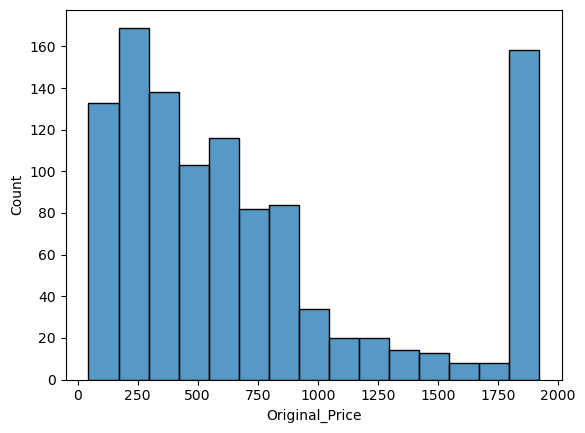

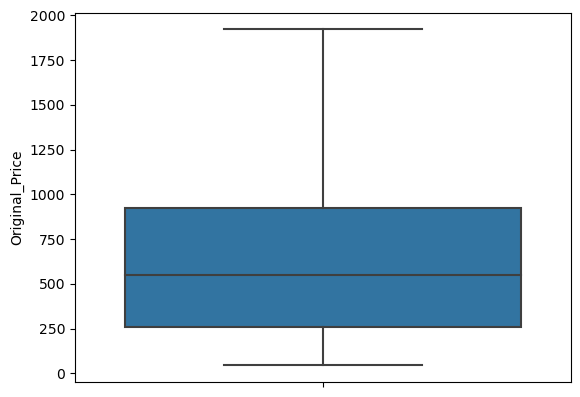

{'missing': 0,
 'min': 45.0,
 'max': 1922.38,
 'mean': 725.42,
 'var': 348434.37,
 'std': 590.28,
 'range': 1877.38,
 'q1': 258.0,
 'q2': 549.0,
 'q3': 923.75,
 'skewness': 1.03,
 'kurtosis': -0.19}

In [81]:
numerical_analysis(data = nykaa, col = "Original_Price")

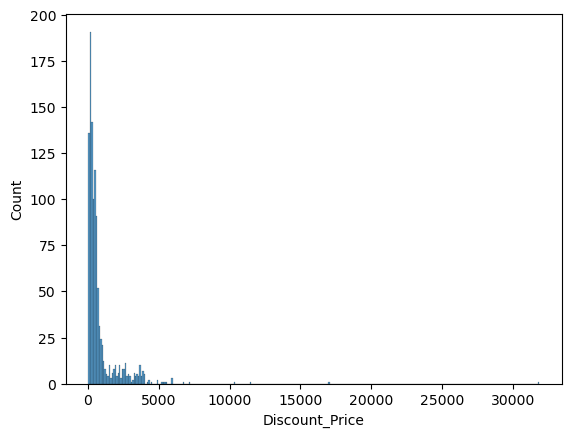

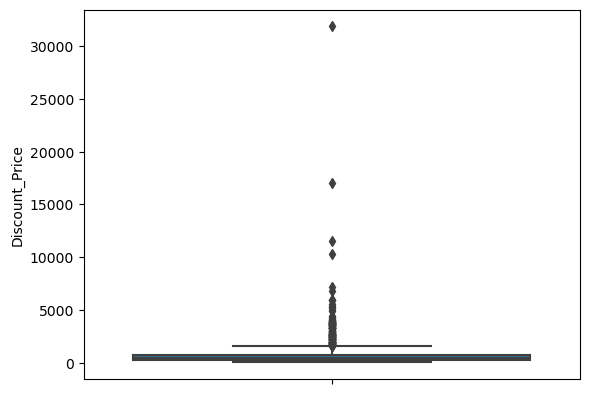

{'missing': 0,
 'min': 33,
 'max': 31875,
 'mean': 839.74,
 'var': 2337258.05,
 'std': 1528.81,
 'range': 31842,
 'q1': 210.0,
 'q2': 424.5,
 'q3': 741.75,
 'skewness': 9.94,
 'kurtosis': 169.21}

In [50]:
numerical_analysis(data = nykaa, col = "Discount_Price")

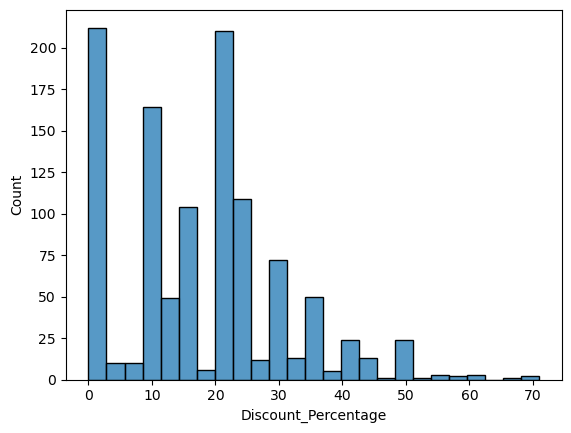

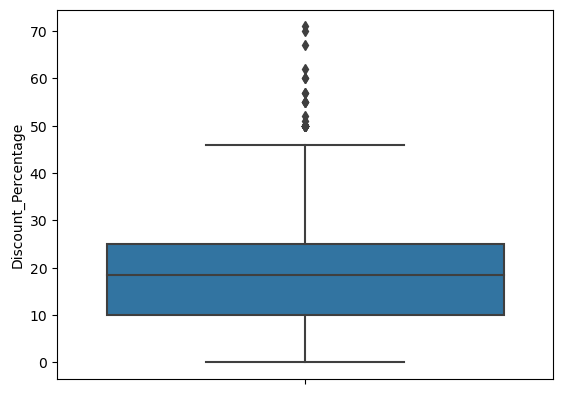

{'missing': 0,
 'min': 0,
 'max': 71,
 'mean': 17.67,
 'var': 172.39,
 'std': 13.13,
 'range': 71,
 'q1': 10.0,
 'q2': 18.5,
 'q3': 25.0,
 'skewness': 0.64,
 'kurtosis': 0.5}

In [51]:
numerical_analysis(data = nykaa, col = "Discount_Percentage")

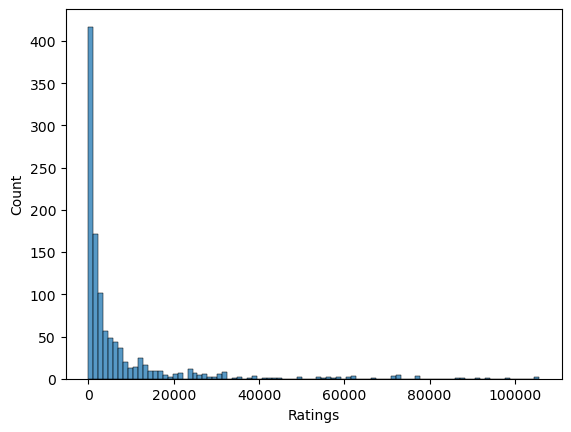

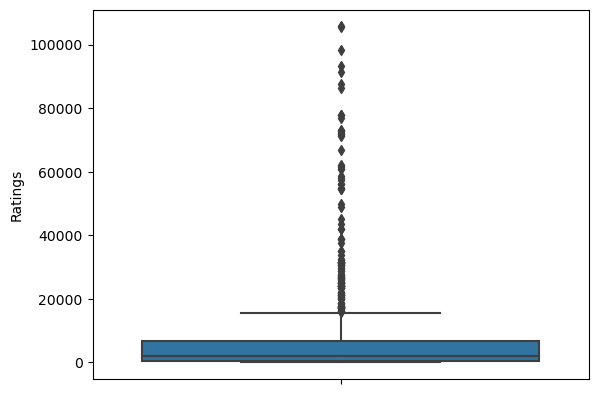

{'missing': 0,
 'min': 0,
 'max': 105717,
 'mean': 6936.18,
 'var': 186820460.63,
 'std': 13668.23,
 'range': 105717,
 'q1': 548.0,
 'q2': 1998.5,
 'q3': 6558.75,
 'skewness': 3.87,
 'kurtosis': 17.53}

In [52]:
numerical_analysis(data = nykaa, col = "Ratings")

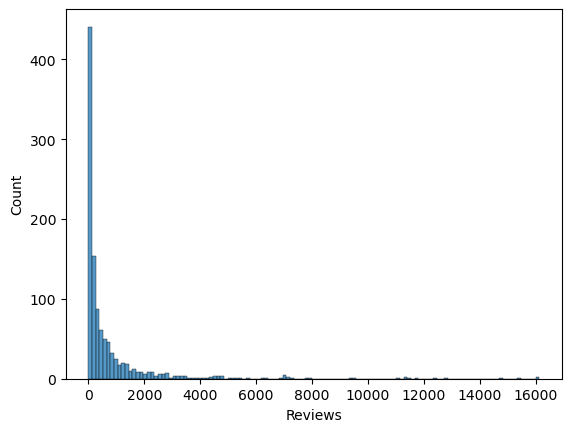

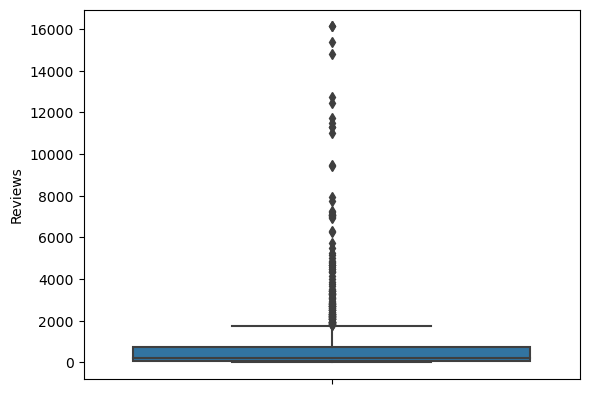

{'missing': 0,
 'min': 0,
 'max': 16132,
 'mean': 796.99,
 'var': 3007201.62,
 'std': 1734.13,
 'range': 16132,
 'q1': 58.0,
 'q2': 215.5,
 'q3': 739.25,
 'skewness': 4.96,
 'kurtosis': 30.79}

In [53]:
numerical_analysis(data = nykaa, col = "Reviews")

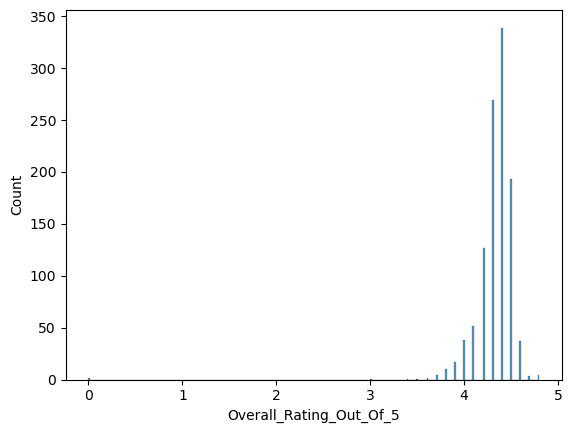

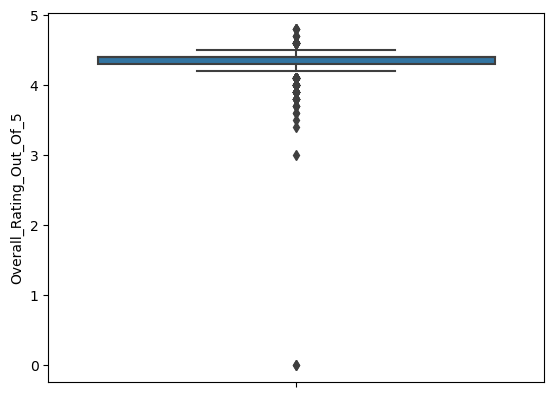

{'missing': 0,
 'min': 0.0,
 'max': 4.8,
 'mean': 4.32,
 'var': 0.06,
 'std': 0.25,
 'range': 4.8,
 'q1': 4.3,
 'q2': 4.4,
 'q3': 4.4,
 'skewness': -9.62,
 'kurtosis': 156.84}

In [54]:
numerical_analysis(data = nykaa, col = "Overall_Rating_Out_Of_5")

## Outlier Treatment 

In [64]:
def outlier_treatment(col):
    q1 = nykaa[col].quantile(.25)
    q3 = nykaa[col].quantile(.75)
    lower_cap = q1 - 1.5 * (q3 - q1)
    upper_cap = q3 + 1.5 * (q3 - q1)

    nykaa[col] = np.where(nykaa[col] >= upper_cap, upper_cap, nykaa[col])
    nykaa[col] = np.where(nykaa[col] <= lower_cap, lower_cap, nykaa[col])

<Axes: ylabel='Original_Price'>

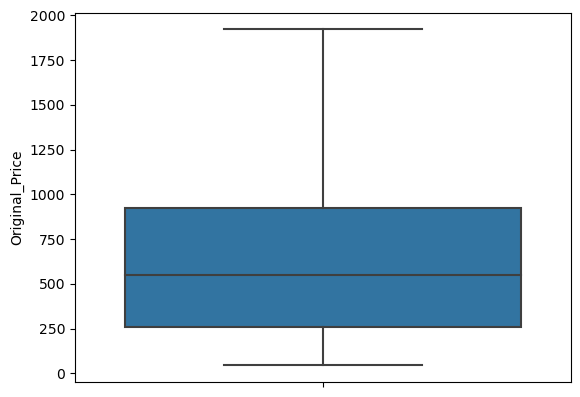

In [65]:
outlier_treatment(col = "Original_Price")
sns.boxplot(data = nykaa, y = "Original_Price")

<Axes: ylabel='Discount_Price'>

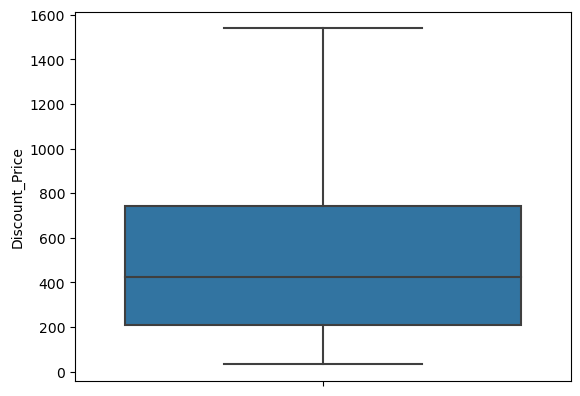

In [67]:
outlier_treatment(col = "Discount_Price")
sns.boxplot(data = nykaa, y = "Discount_Price")

<Axes: ylabel='Discount_Percentage'>

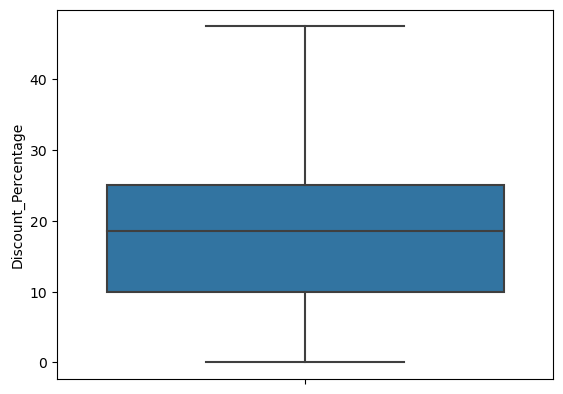

In [69]:
outlier_treatment(col = "Discount_Percentage")
sns.boxplot(data = nykaa, y = "Discount_Percentage")

<Axes: ylabel='Ratings'>

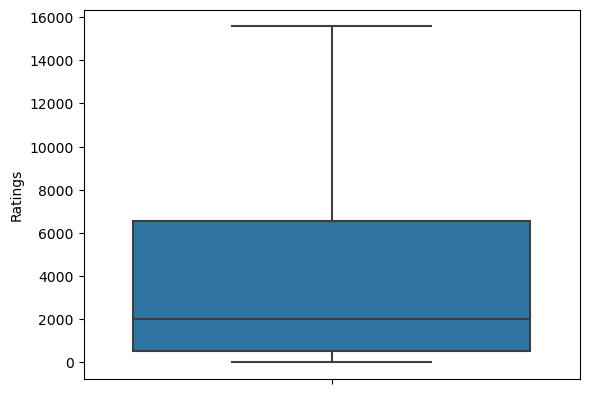

In [71]:
outlier_treatment(col = "Ratings")
sns.boxplot(data = nykaa, y = "Ratings")

<Axes: ylabel='Reviews'>

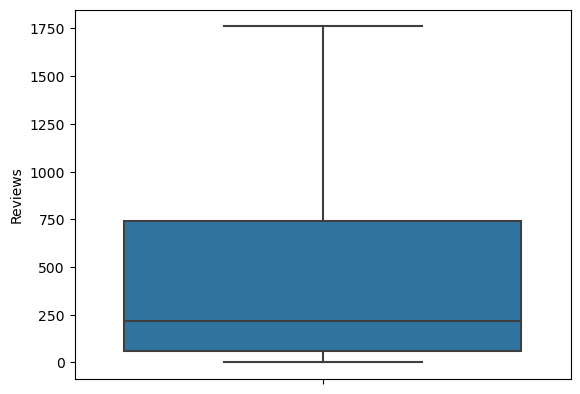

In [73]:
outlier_treatment(col = "Reviews")
sns.boxplot(data = nykaa, y = "Reviews")

<Axes: ylabel='Overall_Rating_Out_Of_5'>

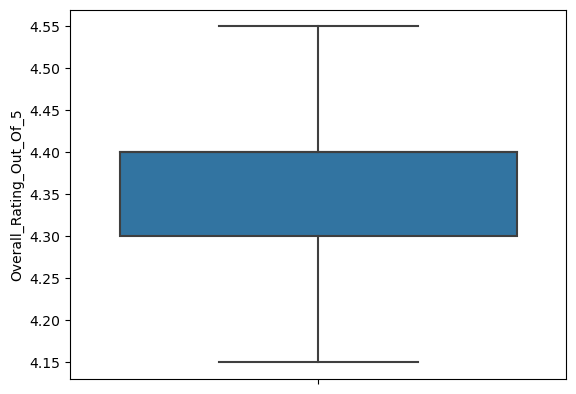

In [75]:
outlier_treatment(col = "Overall_Rating_Out_Of_5")
sns.boxplot(data = nykaa, y = "Overall_Rating_Out_Of_5")

## Data Analysis and Visualisation 

### 1. Product Pricing and Discounts 

In [28]:
#1. What is the average discount percentage?
avg_discount_percentage = nykaa['Discount_Percentage'].mean()
print(f"Average Discount Percentage: {avg_discount_percentage:.2f}%")

Average Discount Percentage: 17.67%


In [29]:
#2. Which product has the highest discount price?
product = nykaa[nykaa['Discount_Price'] == nykaa['Discount_Price'].max()]
product[['Order_ID', 'Product_Name', 'Discount_Price']]

,Order_ID,Product_Name,Discount_Price
654,403342,TEMPTU Air Airbrush Makeup Kit,31875


In [30]:
#3. Are there any products with unusually high or low discount percentages?
high_discount = 50
low_discount = 10

high_discount_products = nykaa[nykaa["Discount_Percentage"] > high_discount]
low_discount_products = nykaa[nykaa["Discount_Percentage"] < low_discount]

In [31]:
high_discount_products

,Order_ID,Product_Name,Product_Url,Original_Price,Discount_Price,Discount_Percentage,Ratings,Reviews,Overall_Rating_Out_Of_5
121,3657958,Love Earth Multipot Lip and Cheek Tint,https://nykaa.com/love-earth-multipot-lipstick...,599,269,55,12544,1257,4.3
151,913213,Bronson Professional Pink Ultimate Classic Bea...,https://nykaa.com/bronson-professional-pink-ul...,250,100,60,15725,1156,4.4
217,6036602,Love Earth Liquid Mousse Lipstick,https://nykaa.com/love-earth-liquid-mousse-lip...,897,403,55,2713,339,4.4
269,484071,Bronson Professional Eyebrow and Face Razor - ...,https://nykaa.com/bronson-professional-tinkle-...,200,98,51,10914,1669,4.1
334,385775,Bronson Professional Beauty Blend Makeup Spong...,https://nykaa.com/bronson-professional-beauty-...,250,95,62,13525,1372,4.1
568,2702166,Bronson Professional Black Tear Drop Super Sof...,https://nykaa.com/bronson-professional-black-t...,230,100,57,2231,157,4.4
679,3761937,Bronson Professional Purple Beauty Blend Makeu...,https://nykaa.com/bronson-professional-beauty-...,230,110,52,2353,98,4.3
693,247018,Wet n Wild Color Icon Eyeshadow 10 Pan Palette,https://nykaa.com/wet-n-wild-color-icon-eyesha...,799,320,60,9466,2501,4.4
696,747946,WOW Skin Science Vitamin C Face Serum,https://nykaa.com/wow-skin-science-vitamin-c-s...,699,315,55,4373,656,4.2
719,1016490,Beautiliss Supreme Makeup Brush Set - 10 Pcs,https://nykaa.com/beautiliss-supreme-makeup-br...,1000,300,70,292,23,3.7


In [32]:
low_discount_products

,Order_ID,Product_Name,Product_Url,Original_Price,Discount_Price,Discount_Percentage,Ratings,Reviews,Overall_Rating_Out_Of_5
21,89231,M.A.C Studio Fix Powder Plus Foundation,https://nykaa.com/m-a-c-studio-fix-powder-plus...,3300,3300,0,10940,1466,4.4
35,331327,M.A.C Lipstick / Mini,https://nykaa.com/lipstick-little-m-a-c/p/3313...,1250,1250,0,21900,4844,4.4
43,520378,Nykaa Cosmetics Matte To Last! Mini Liquid Lip...,https://nykaa.com/nykaa-matte-to-last-mini-liq...,325,325,0,91374,15383,3.9
48,5694087,Pixi On The Glow Cream Blush,https://nykaa.com/pixi-on-the-glow-blush/p/569...,1950,1950,0,1295,271,4.3
58,5914155,Nykaa Cosmetics Instalike Nail Enamel,https://nykaa.com/nykaa-cosmetics-instalike-na...,119,119,0,5304,460,4.5
...,...,...,...,...,...,...,...,...,...
1079,5139822,PAT McGRATH LABS Liquilust Legendary Wear Matt...,https://nykaa.com/pat-mcgrath-labs-liquilust-l...,2700,2700,0,123,46,4.4
1086,2735779,Huda Beauty Glowish Multidew Skin Tint,https://nykaa.com/huda-beauty-glowish-multidew...,3500,3500,0,180,34,4.1
1088,10439562,FYOLI Triangle Pizza Powder Puff And Beauty Bl...,https://nykaa.com/fyoli-triangle-pizza-powder-...,150,150,0,182,21,3.8
1091,2768518,Nudestix Intense Matte Lip + Cheek Pencil,https://nykaa.com/nudestix-intense-matte-lip-c...,2850,2850,0,106,24,4.5


### 2. Product Ratings and Reviews 

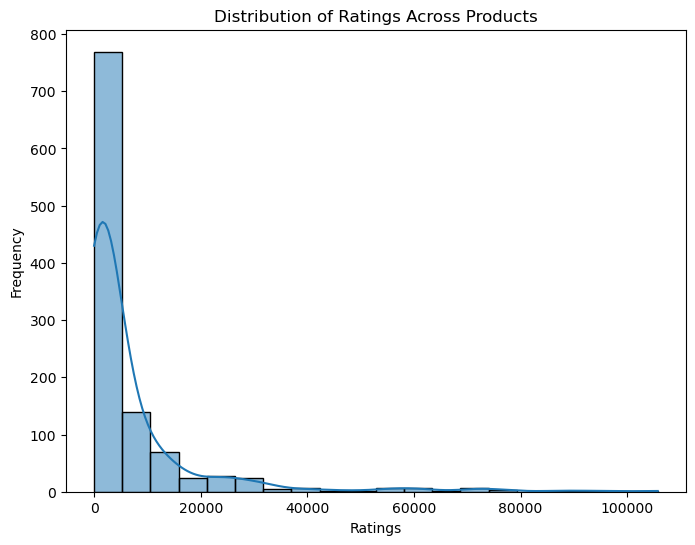

In [33]:
#1. Distribution of ratings across products
plt.figure(figsize=(8, 6))
sns.histplot(nykaa['Ratings'], bins=20, kde=True)
plt.title('Distribution of Ratings Across Products')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

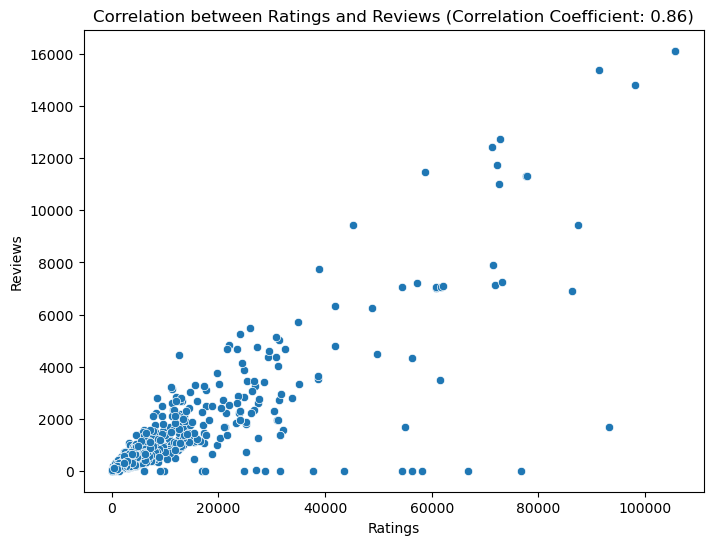

In [34]:
#2. Correlation between product ratings and reviews 
correlation = nykaa['Ratings'].corr(nykaa['Reviews'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ratings', y='Reviews', data=nykaa)
plt.title(f'Correlation between Ratings and Reviews (Correlation Coefficient: {correlation:.2f})')
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.show()

In [35]:
#3. Products having high rating out of 5 but relatively low number of ratings:
high_ratings_out_of_5 = 4.0
low_num_of_ratings = 30

low_ratings_high_reviews = nykaa[(nykaa['Overall_Rating_Out_Of_5'] > high_ratings_out_of_5) & (nykaa['Ratings'] < low_num_of_ratings)]

low_ratings_high_reviews[['Product_Name', 'Overall_Rating_Out_Of_5', 'Reviews']]

,Product_Name,Overall_Rating_Out_Of_5,Reviews
641,Smashbox Always On Liquid Lipstick - Gulabae (...,4.5,8
771,Bobbi Brown Extra Lip Tint Duo - Bare Pink,4.3,2
830,Estee Lauder Pure Color Lipstick Emerald (Matte),4.5,5
831,SUGAR Complete Makeup Kit - Fair,4.3,1
943,ICONIC London Illuminator,4.5,8
968,TEMPTU One Airbrush Makeup Kit,4.8,1
988,Clinique X Kate Spade Pop Plush Creamy Lip Gloss,4.1,5
1036,NYX Professional Makeup Barbie On The Go Cheek...,4.3,4
1070,M.A.C Connect In Colour Eye Shadow Palette X6,4.8,0
1096,Nykaa Cosmetics Insta Dry Nail Enamel - Reelin...,4.4,1


### 3. Best and Worst Products 

In [36]:
#1. Products having highest overall rating out of 5
top_products = nykaa.sort_values(by='Overall_Rating_Out_Of_5', ascending=False)
top_products[['Product_Name', 'Overall_Rating_Out_Of_5']].head()

,Product_Name,Overall_Rating_Out_Of_5
1070,M.A.C Connect In Colour Eye Shadow Palette X6,4.8
527,Praush Sweet Cheeks Liquid Blush,4.8
1031,ETUDE HOUSE Lovely Cookie Pressed Powder Blush,4.8
968,TEMPTU One Airbrush Makeup Kit,4.8
815,LANEIGE Lip Treatment Balm,4.7


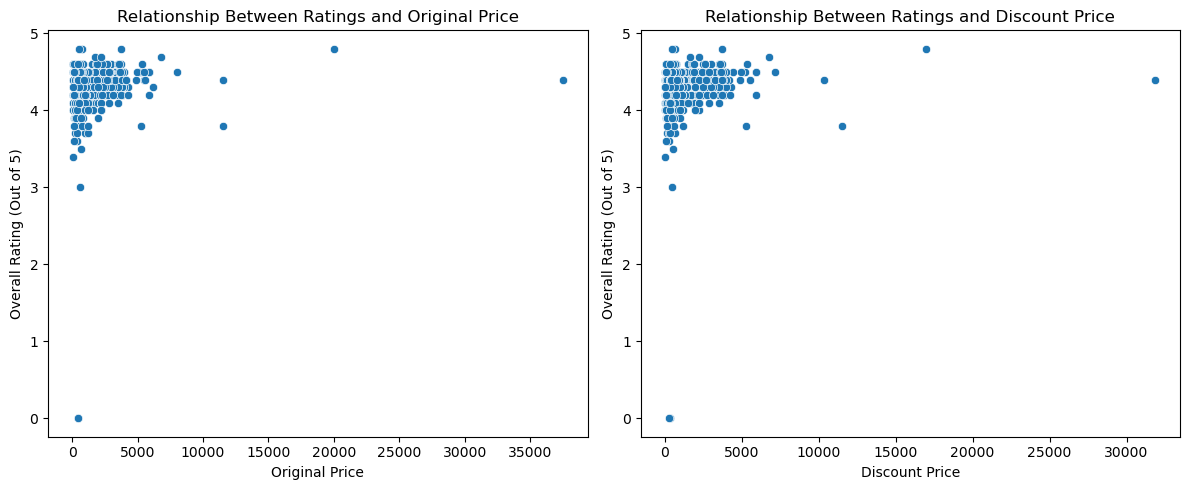

In [37]:
#2. Visualise any patterns between Product Ratings and Price (Discounted or Original)

#Original Price vs Overall Rating
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Original_Price', y='Overall_Rating_Out_Of_5', data=nykaa)
plt.title('Relationship Between Ratings and Original Price')
plt.xlabel('Original Price')
plt.ylabel('Overall Rating (Out of 5)')

# Discount Price vs Overall Rating
plt.subplot(1, 2, 2)
sns.scatterplot(x='Discount_Price', y='Overall_Rating_Out_Of_5', data=nykaa)
plt.title('Relationship Between Ratings and Discount Price')
plt.xlabel('Discount Price')
plt.ylabel('Overall Rating (Out of 5)')

plt.tight_layout()
plt.show()

In [38]:
#3. Categorise final price into Low, Medium and High values
bins = [0, 500, 1000, 5000, float('inf')]
labels = ['Low', 'Medium', 'High', "Very High"]

nykaa['Discount_Price_Range'] = pd.cut(nykaa['Discount_Price'], bins = bins, labels = labels)

In [39]:
nykaa.groupby(["Discount_Price_Range"])["Order_ID"].count()

Discount_Price_Range
Low          647
Medium       250
High         190
Very High     13
Name: Order_ID, dtype: int64